-----------------------------------------------
***0. Import libraries***

In [153]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
warnings.simplefilter('ignore')
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-----------------------------------------------
***1. Load the data***
- *For now we will only use the listings file ONLY.*

In [154]:
# Read csv
listings = pd.read_csv('Data/listings.csv')
listings.iloc[:5, :5]

,id,listing_url,scrape_id,last_scraped,name
0,7830063,https://www.airbnb.com/rooms/7830063,20170407214119,2017-04-08,Quiet room in Plaza Mayor
1,9898596,https://www.airbnb.com/rooms/9898596,20170407214119,2017-04-08,Homely apartment in the heart of Madrid
2,15334645,https://www.airbnb.com/rooms/15334645,20170407214119,2017-04-08,Piso Muy Luminoso en pleno centro de Madrid
3,1307795,https://www.airbnb.com/rooms/1307795,20170407214119,2017-04-08,Rent room in the heart of Madrid
4,17410608,https://www.airbnb.com/rooms/17410608,20170407214119,2017-04-08,Luxury duplex penthouse in historic building


***2. Analysis of all variables***

- ***Let's print the name of the variables that are available***

In [155]:
# Print name of columns
print(listings.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

- Now let's start analyzing one by one and seing which ones we might use

In [156]:
# Percentage of missing values
print('Percentage of missing values in access column: ', listings['access'].isnull().mean()*100, '%')
# Now let's see some examples where there are values
listings['access'].dropna().iloc[2]

Percentage of missing values in access column:  43.4120734908 %


'All elements in my flat are available to guests'

- 'Access' seems to show which of the services will be accessible by the client. It may important, but we will discard it (we won't use text in this project although text can be used for models and analysis as well).

In [157]:
# Head of accommodates column
listings.accommodates.head()

0     2
1    10
2     2
3     2
4     4
Name: accommodates, dtype: int64

Accommodates means the capacity of the apartment

In [158]:
# Explore head
listings.amenities.head()
print(listings.amenities.notnull().mean())

1.0


amenities seem to be the basic features of the flat. Let's keep it, it's an important predictor.

All the availability columns are important for the analysis. We should keep them

- Basic column selection

In [159]:
listings.bed_type.value_counts()

Real Bed         13039
Pull-out Sofa      240
Futon               36
Couch               15
Airbed               5
Name: bed_type, dtype: int64

- We won't use that one, it may be useful but it's too specific

In [160]:
# Selected columns
selected_columns = ['accommodates', 'amenities', 'availability_30', 'availability_365',
                    'availability_60', 'availability_90', 'bathrooms', 'bed_type', 
                    'bedrooms', 'beds', 'calculated_host_listings_count', 'calendar_last_scraped', 
                    'calendar_updated',  'cancellation_policy', 'city', 'cleaning_fee', 'country', 
                    'country_code', 'description', 'experiences_offered', 'extra_people', 'first_review',
                    'guests_included', 'has_availability', 'host_about', 'host_acceptance_rate', 
                    'host_has_profile_pic', 'host_id', 'host_identity_verified', 'host_is_superhost', 
                    'host_listings_count', 'host_location', 'host_name', 'host_neighbourhood',
                    'host_picture_url', 'host_response_rate', 'host_response_time', 
                    'host_since', 'host_thumbnail_url', 'host_total_listings_count', 
                    'host_url', 'host_verifications', 'house_rules', 'id', 'instant_bookable', 
                    'interaction', 'is_location_exact', 'jurisdiction_names', 'last_review', 'last_scraped',
                    'latitude', 'license', 'listing_url', 'longitude', 'market', 'maximum_nights', 
                    'medium_url', 'minimum_nights', 'monthly_price', 'name', 'neighborhood_overview', 
                    'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                    'notes', 'number_of_reviews', 'picture_url', 'price', 'property_type',
                    'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license',
                    'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness',
                    'review_scores_communication', 'review_scores_location', 'review_scores_rating',
                    'review_scores_value', 'reviews_per_month', 'room_type', 'scrape_id', 'security_deposit',
                    'smart_location', 'space', 'square_feet', 'state', 'street', 'summary', 'thumbnail_url', 
                    'transit', 'weekly_price', 'xl_picture_url', 'zipcode']

- If a house is rented the whole year, the availability of the next 365 days is 0. This means this house is a long-term rent house, which we do not want to take into account in this project. The maximum number of days considered as short term rent are 90.

In [161]:
# Print the number of houses that fullfil this criteria
print((listings['availability_365']==0).mean()*100, '% of the listings are not available.')

# Filter houses that are rented the whole year
listings = listings[listings['availability_365']!=0]

# We will drop the "has_availability" column
print(listings['has_availability'].unique())
listings.drop('has_availability', axis=1, inplace=True)

8.47394075741 % of the listings are not available.
[ nan]


- We dropped "has_availability". In Madrid, all listings posted are available, although some of the houses may be completely booked.

In [162]:
# Clean price
for char in ['$', ',', '.']:
    listings['price'] = listings['price'].str.replace(char, '')
listings['price'] = listings['price'].astype(float) / 100

-----------------------------------------------
***3. Exploratory data analysis***
- *In this section we will try to answer several questions whose answer may be different for the Airbnb business model (when comparing it to the traditional house rental - real estate business model.*

***3.1 Difference between all availability variables and influence of time***

- The bigger the window with which we are looking into the future, the higher the probability of finding available houses. Therefore, if we look only 30 days from now into the future, houses will be less "available" in general. Later on we will decide which availability we will use to model the demand of a certain house.

- For now, we can take a look at how availability changes when increasing the timeframe / window.

- We can create percentage availability columns using the total number of days in each window. For example, the percentage of days available if we are looking 30 days on would be:

$$Availability_{ 30 days, \%} = 100 \frac{Days Available}{30} [\%]$$

- For any window (30 days, 60, days, 90 days, etc...)

$$Availability_{\%} = 100 \frac{Days Available}{Maximum Days of period} [\%]$$


In [163]:
# Availability columns
availability_columns = listings.columns[listings.columns.str.contains('availability')]
print(availability_columns.tolist())
# Let's create % availability for each of them
for column in availability_columns:
    listings[column+'_percent'] = 100 * listings[column] / listings[column].max();

['availability_30', 'availability_60', 'availability_90', 'availability_365']


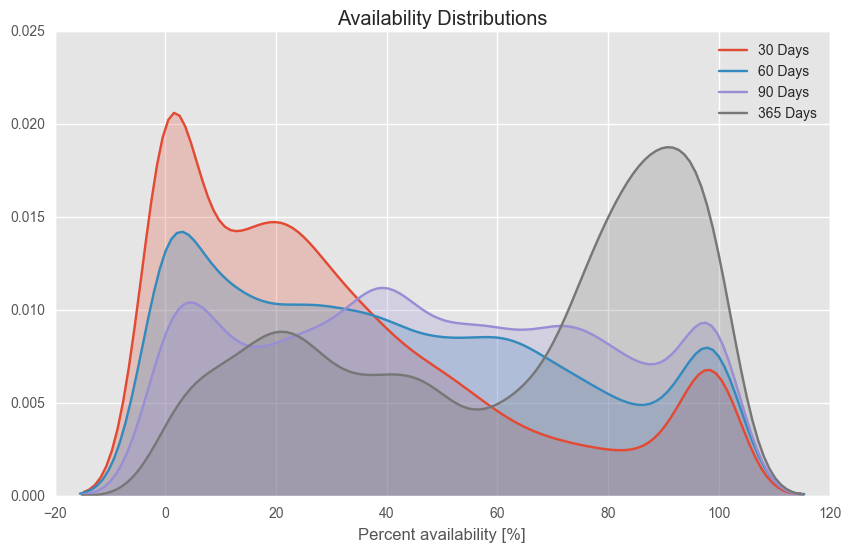

In [164]:
# Plot the distributions
percent_availability_columns = listings.columns[listings.columns.str.contains('percent')]
fig, ax = plt.subplots(figsize=(10,6))
for column in percent_availability_columns:
    sns.kdeplot(listings[column], shade=True)
# Title axis etc
ax.set_title('Availability Distributions')
ax.set_xlabel('Percent availability [%]')

# Legend and labels
ax.legend(labels=['30 Days', '60 Days', '90 Days', '365 Days']);

***3.2 Is price a relevant variable?***

> Although there are a number of non linearities (the neighborhood, number of rooms, etc), an univariate visualization of price vs availability should show that lower prices imply lower availability, since it is easier to rent a house if the listing price is lower.

- Let's plot the distribution of availabilities from the time of the analysis to 60 days on. There should be a difference between the distribution of availabilities for cheap houses and expensive houses.

- We can create price buckets. For that let's first visualize the price quantiles. Since there are whole apartments and single rooms, lets create two different plots. Also, we should take into account the fact that the number of rooms is an important factor that we are not seeing here

In [175]:
# Types of apartments
listings.room_type.value_counts()

Entire home/apt    7385
Private room       4640
Shared room         180
Name: room_type, dtype: int64

- For this analysis we can discard shared rooms since there are a small number of them.

In [179]:
# Let's plot the distribution of availabilities from the time of the analysis to 60 days on.
for type_of_space in ['Entire home/apt', 'Private room']:
    print('Deciles for %s \n' % type_of_space, 
    pd.qcut(listings[listings.room_type==type_of_space]
            .price, q=4, retbins=True)[1])

Deciles for Entire home/apt 
 [   12.    55.    73.   100.  3189.]
Deciles for Private room 
 [    9.    22.    30.    39.  7700.]


- Let's plot the availability distributions for all quantiles. We will use the availaility 60 variable and we will create one plot for each kind of rental.

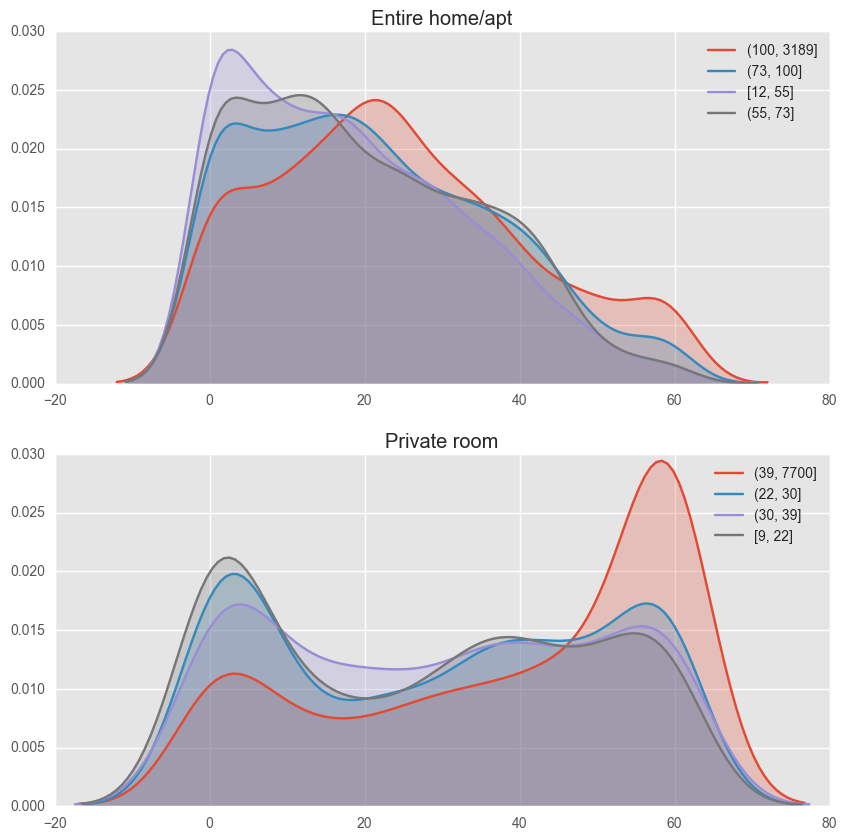

In [198]:
# Select availability column that we will plot
selected_availability = 'availability_60'

# Create matplotlib axes
fig, axes = plt.subplots(2, 1, figsize=(10,10))
# Iterate
for i, type_of_space in enumerate(['Entire home/apt', 'Private room']):
    # Set title
    axes[i].set_title(type_of_space)
    # Filter the dataframe
    filtered = listings[listings['room_type']==type_of_space]
    # Create quantiles
    filtered['quantile'] = pd.qcut(filtered.price, q=4)
    # Plot availabilities
    for quantile in filtered['quantile'].unique():
        sns.kdeplot(
            filtered[filtered['quantile']==quantile][selected_availability], 
            shade=True, ax=axes[i], label=quantile)

***3.2 Are there differences between neighborhoods?***

- We can make boxplots with different neighborhoods and variables. For these examples, let's plot full apartments only.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

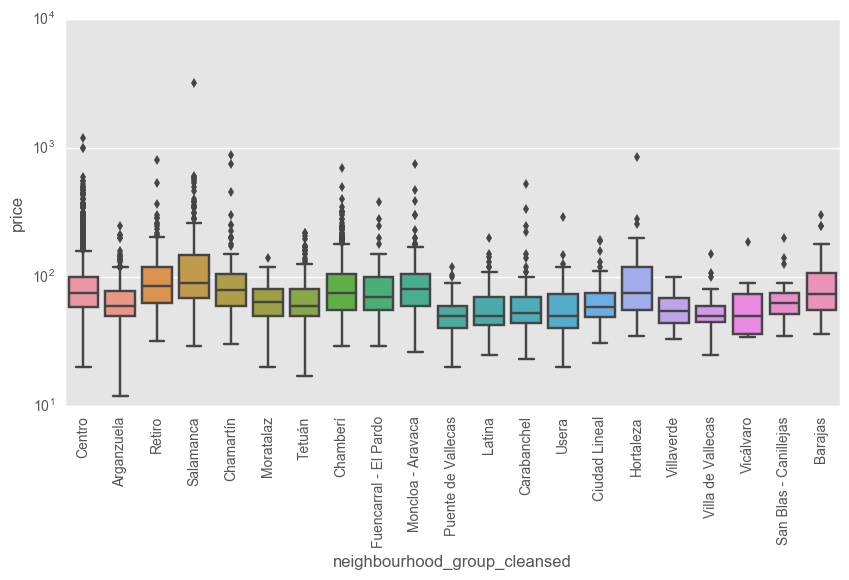

In [220]:
# Let's print different neighborhoods
list_of_neighborhoods = listings.neighbourhood_group_cleansed.unique().tolist()
# Filter full apartments
filtered = listings[listings['room_type']=='Entire home/apt']
# Plot
selected_column = 'price'
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='neighbourhood_group_cleansed', y=selected_column, data=filtered, ax=ax)
plt.yscale('log')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

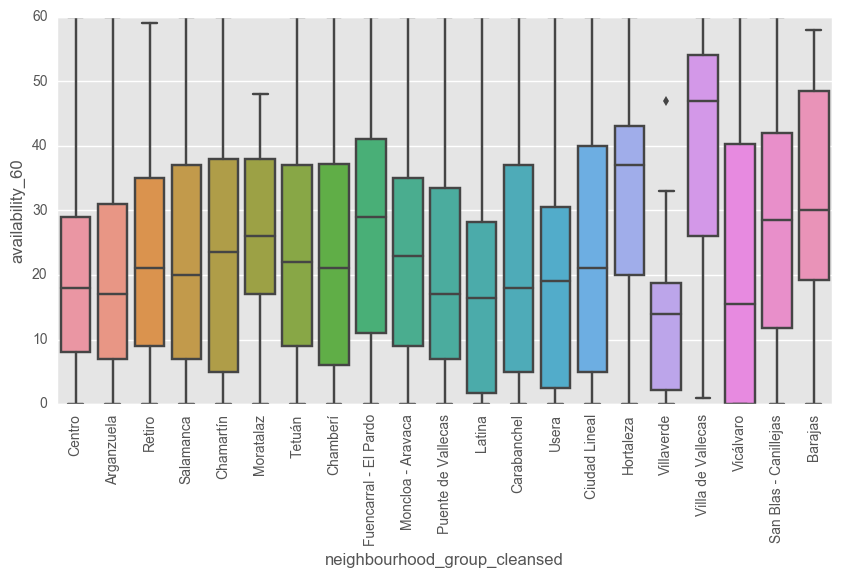

In [211]:
# Let's print different neighborhoods
list_of_neighborhoods = listings.neighbourhood_group_cleansed.unique().tolist()
# Filter full apartments
filtered = listings[listings['room_type']=='Entire home/apt']
# Plot
selected_column = 'availability_60'
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='neighbourhood_group_cleansed', y=selected_column, data=filtered, ax=ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

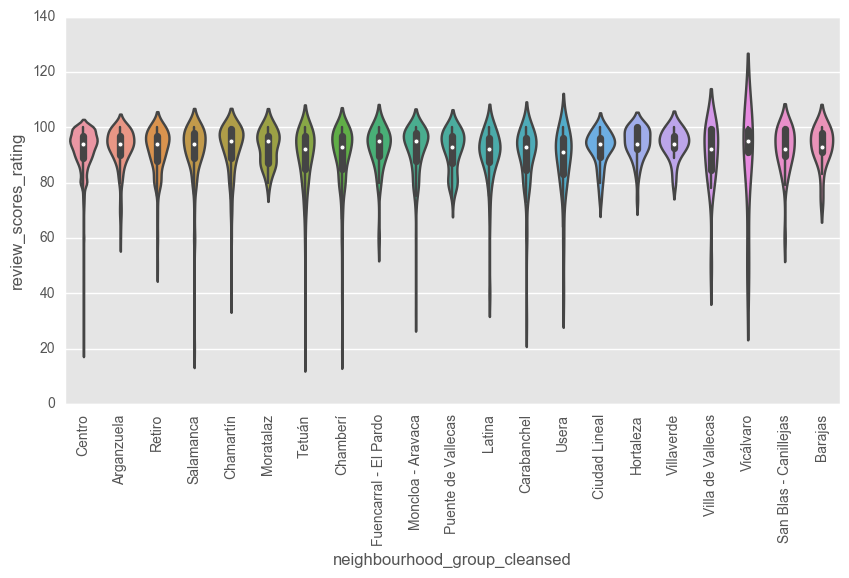

In [228]:
# Let's print different neighborhoods
list_of_neighborhoods = listings.neighbourhood_group_cleansed.unique().tolist()
# Filter full apartments
filtered = listings[listings['room_type']=='Entire home/apt']
# Plot
selected_column = 'review_scores_rating'
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='neighbourhood_group_cleansed', y=selected_column, data=filtered, ax=ax)
plt.xticks(rotation=90)

In [ ]:
# Out of curiosity, plot availability by bed type
listings[['availability_30', 'bed_type']].boxplot(by='bed_type', figsize=(15,7));

In [ ]:
# Replace weird characters in price
for char in ['$', ',', '.']:
    listings['price'] = listings['price'].str.replace(char, '')
listings['price'] = listings['price'].astype(float) / 100

In [ ]:
# Out of curiosity, plot availability by price
listings[(listings['month']==4)&(listings['price']<250)]\
    .plot(kind='scatter', x='price', y='availability_60', alpha=0.05);

In [ ]:
# Create price buckets
listings['price_bucket'] = pd.cut(listings['price'], bins=np.arange(0,600,100).tolist()+[np.inf])

In [ ]:
listings.boxplot(column='availability_30', by='price_bucket', figsize=(10,7));

In [ ]:
# Example of house with low price and high availability


In [ ]:
listings[(listings['price']>50)&(listings['price']<100)]\
    ['availability_60'].plot(kind='hist', bins=np.arange(0,61,5))

In [ ]:
# Plot all availability distributions
listings.groupby('price_bucket')['availability_60'].plot(
    kind='hist', legend=True, figsize=(10,7), bins=20,
    normed=True);

In [ ]:
listings[
    (listings['neighbourhood_group_cleansed']=='Queens') & 
    (listings['price']<1000)].plot(kind='scatter', x='price', y='availability_30', alpha=1)

In [ ]:
listings[listings['price']>1000][['price', 'weekly_price', 'monthly_price', 'has_availability']]